Credit Risk Classification Dataset
Is Customer is Risky or Not Risky ?

PRAVEEN · UPDATED 2 YEARS AGO

https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset

Target Column 0-Low Credit Risk 1-High Credit Risk

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA

Обучающая выборка

In [201]:

def check(r):
    # True если все нормально
    ret = True
    for i in r:
        if pd.isna(i): 
            ret = False
            break
    return ret

In [202]:
# winequalityN = pd.read_csv('./winequalityN.csv').drop(columns=['type'])

# buf_x = []
# buf_y = []

# X_train = []
# Y_train = []

# X_test = []
# Y_test = []

# index = 0


# for i in winequalityN.values.tolist():
#     if check(i):
#         buf_x.append(i[0:-1])
#         buf_y.append(i[-1])

# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(buf_x, buf_y, test_size=0.2)
        
    


In [203]:
custumers_data = pd.read_csv('./customer_data.csv').drop(columns=['id'])

In [204]:
custumers_data

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [205]:
buf_x = []
buf_y = []

for i in custumers_data.values.tolist():
    if check(i):
        buf_x.append(i[1:len(i)])
        buf_y.append(i[0])


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(buf_x, buf_y, test_size=0.2)

In [206]:
custumers_data.values.tolist()[2][1:len(custumers_data.values.tolist()[2])], custumers_data.values.tolist()[2][0]

([7.0, 1298.0, 1.0, 110000.0, 2.0, 11.0, -1.0, 101.0, 5.0, 72001.0, 1.0], 0.0)

Отображение данных на двумерной плоскости, метод главных компонент

In [207]:
pca = PCA(n_components = 2)
XPCAreduced_X_train = pca.fit_transform(X_train)
XPCAreduced_X_test =pca.fit_transform(X_test)

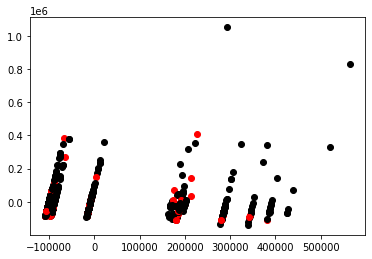

In [208]:
colors_two = ['#000000', '#ff0000']
for i in range(len(XPCAreduced_X_train)):
    plt.scatter(XPCAreduced_X_train[i][0] , XPCAreduced_X_train[i][1], c=colors_two[int(Y_train[i])])

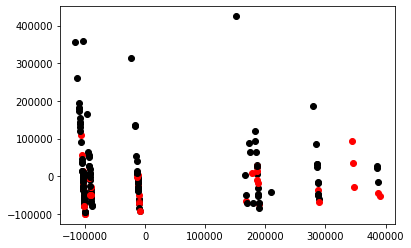

In [209]:
for i in range(len(XPCAreduced_X_test)):
    plt.scatter(XPCAreduced_X_test[i][0] , XPCAreduced_X_test[i][1], c=colors_two[int(Y_test[i])])

Классификации

In [210]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

СГД

In [211]:
from sklearn.linear_model import SGDClassifier

sgd_reg = SGDClassifier()

sgd_reg.fit(X_train, Y_train)

y_pred = sgd_reg.predict(X_test)

print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))

[[117  35]
 [ 20  24]]
              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       152
         1.0       0.41      0.55      0.47        44

    accuracy                           0.72       196
   macro avg       0.63      0.66      0.64       196
weighted avg       0.75      0.72      0.73       196

0.7193877551020408


In [212]:
y_pred

array([0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1.])

k соседей

In [213]:
from sklearn.neighbors import KNeighborsClassifier

k_neighb = KNeighborsClassifier()

k_neighb.fit(X_train, Y_train)

y_pred = k_neighb.predict(X_test)

print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))

[[143   9]
 [ 38   6]]
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86       152
         1.0       0.40      0.14      0.20        44

    accuracy                           0.76       196
   macro avg       0.60      0.54      0.53       196
weighted avg       0.70      0.76      0.71       196

0.7602040816326531


Дерево

In [214]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))

[[129  23]
 [ 32  12]]
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       152
         1.0       0.34      0.27      0.30        44

    accuracy                           0.72       196
   macro avg       0.57      0.56      0.56       196
weighted avg       0.70      0.72      0.71       196

0.7193877551020408


In [215]:
import random
def create_rand_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]
    return color

In [216]:
def one_model_res(model):
    preds = [int(i) for i in model.predict(X_test)]
    reals = [int(i) for i in Y_test]

    correctly = 0
    for i in range(len(preds)):
        if preds[i] == reals[i]:
            correctly += 1

    CR = correctly / len(preds)

    metki = list(set(reals))

    cl = create_rand_colors(len(metki))

    colors = {}

    for i in range(len(cl)):
        colors[metki[i]] = cl[i]

    for i in range(len(XPCAreduced_X_test)):
        plt.scatter(XPCAreduced_X_test[i][0],XPCAreduced_X_test[i][1],c = colors[preds[i]])
        
    print(CR)


In [217]:
def one_model(model):
    y_pred = clf.predict(X_test)
    for i in range(len(y_pred)):
        plt.scatter(XPCAreduced_X_test[i][0],XPCAreduced_X_test[i][1], c = colors_two[int(y_pred[i])])

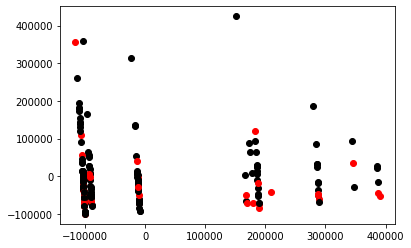

In [218]:
one_model(sgd_reg)

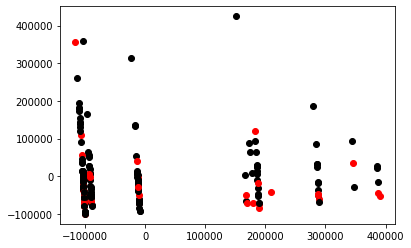

In [219]:
one_model(sgd_reg)

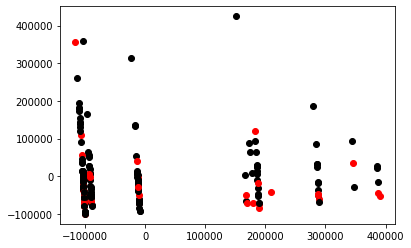

In [220]:
one_model(k_neighb)

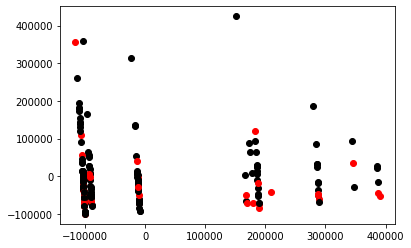

In [221]:
one_model(clf)

Нейронная сеть

Класс MLPClassifier реализует алгоритм многослойного перцептрона (MLP), который обучается с использованием обратного распространения .

In [222]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(15, 3))

nn.fit(X_train, Y_train)



MLPClassifier(hidden_layer_sizes=(15, 3), solver='lbfgs')

In [223]:
y_pred = nn.predict(X_test)

print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))

[[152   0]
 [ 44   0]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87       152
         1.0       0.00      0.00      0.00        44

    accuracy                           0.78       196
   macro avg       0.39      0.50      0.44       196
weighted avg       0.60      0.78      0.68       196

0.7755102040816326


C:\Users\grvla\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\grvla\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\grvla\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

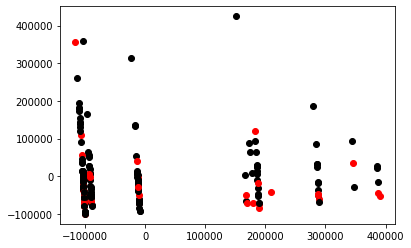

In [224]:
one_model(nn)
    